### NLP Data Quality, Data Drift

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import plotly.express as px
import networkx as nx
from num2words import num2words
import plotly.graph_objects as go

In [2]:
baseline = pd.read_csv("baseline.csv")

In [3]:
baseline.head()

,Unnamed: 0,text,target,cleaned_text
0,0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching one oz episode...
1,1,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
2,2,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
3,3,I saw this movie when I was about 12 when it c...,negative,saw movie twelve came recall scariest scene bi...
4,4,So im not a big fan of Boll's work but then ag...,negative,im big fan boll work many enjoyed movie postal...


In [4]:
baseline.drop(["Unnamed: 0", "cleaned_text"], axis=1, inplace=True)

In [6]:
baseline.head()

,text,target
0,One of the other reviewers has mentioned that ...,positive
1,I thought this was a wonderful way to spend ti...,positive
2,Basically there's a family where a little boy ...,negative
3,I saw this movie when I was about 12 when it c...,negative
4,So im not a big fan of Boll's work but then ag...,negative


In [7]:
# Type token ratio in data drift

# sytax drift
# semantic drift

# add model
# probabilities

In [8]:
prod = pd.read_csv("01st Dec 2023.csv")

In [9]:
prod.head()

,Unnamed: 0,text,target,probs,cleaned_text
0,0,I really liked this Summerslam due to the look...,positive,0.505030,really liked summerslam due look arena curtain...
1,1,Not many television shows appeal to quite as m...,positive,0.691188,many television show appeal quite many differe...
2,2,The film quickly gets to a major chase scene w...,negative,0.870640,film quickly get major chase scene ever increa...
3,3,Jane Austen would definitely approve of this o...,positive,0.763405,jane austen would definitely approve onebr br ...
4,4,Expectations were somewhat high for me when I ...,negative,0.642498,expectation somewhat high went see movie thoug...


In [16]:
pip install textstat

Note: you may need to restart the kernel to use updated packages.


In [25]:
baseline_words = get_words(baseline)

In [26]:
baseline_words

['one',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 '1',
 'oz',
 'episode',
 'you',
 'will',
 'be',
 'hooked',
 'they',
 'are',
 'right',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'mebr',
 'br',
 'the',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'go',
 'trust',
 'me',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 'this',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 'sex',
 'or',
 'violence',
 'its',
 'is',
 'hardcore',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'wordbr',
 'br',
 'it',
 'is',
 'called',
 'oz',
 'as',
 'that',
 'is',
 'the',
 'nickname',
 'given',
 'to',
 'the',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'it',
 'focu

In [27]:
from spellchecker import SpellChecker

In [28]:
checker = SpellChecker()
misspelled = checker.unknown(baseline_words)

In [29]:
misspelled

{'runtimebr',
 'horrorsci',
 'kagome',
 'considerbr',
 'lsdtripped',
 'peoplen',
 'reubens',
 'adoor',
 'porzikova',
 'uav',
 'noltes',
 'mindblowingbr',
 'hampshire',
 'wellafter',
 '15second',
 'nabokov',
 'englandas',
 'sherlyn',
 'tattydesperatepublicity',
 'meen',
 'personaebr',
 'farmworker',
 'gokbakar',
 'coolhand',
 'firetrapstinky',
 'makingwell',
 'bihn',
 'phoolan',
 'badassed',
 'lifecrippling',
 'meringueit',
 'nowwho',
 'moscovich',
 'cahills',
 'ripoffjust',
 'mongomerybr',
 'awaythe',
 'ferrelladam',
 'hartley',
 'tibbits',
 'drillthat',
 'decentlooking',
 'afroamerican',
 'writerdirectorstar',
 'albiet',
 'bckman',
 'arrondisments',
 'pinochet',
 'flys',
 'enteraining',
 'characterseven',
 'welldevelopedits',
 'malone',
 'aceves',
 'jhj',
 'highangle',
 'clipperbr',
 'hartnetthow',
 'consciousrather',
 'agencybr',
 'nagares',
 'everfreaky',
 'jullie',
 '4kidsit',
 'leguizamobr',
 'boooring',
 'spasming',
 'viscousif',
 'asian',
 'greenwald',
 'tunein',
 'snaut',
 'fin

In [30]:
len(baseline_words), len(misspelled)

(4640698, 68533)

In [32]:
from collections import Counter

In [37]:
Counter(misspelled)

Counter({'runtimebr': 1,
         'horrorsci': 1,
         'kagome': 1,
         'considerbr': 1,
         'lsdtripped': 1,
         'peoplen': 1,
         'reubens': 1,
         'adoor': 1,
         'porzikova': 1,
         'uav': 1,
         'noltes': 1,
         'mindblowingbr': 1,
         'hampshire': 1,
         'wellafter': 1,
         '15second': 1,
         'nabokov': 1,
         'englandas': 1,
         'sherlyn': 1,
         'tattydesperatepublicity': 1,
         'meen': 1,
         'personaebr': 1,
         'farmworker': 1,
         'gokbakar': 1,
         'coolhand': 1,
         'firetrapstinky': 1,
         'makingwell': 1,
         'bihn': 1,
         'phoolan': 1,
         'badassed': 1,
         'lifecrippling': 1,
         'meringueit': 1,
         'nowwho': 1,
         'moscovich': 1,
         'cahills': 1,
         'ripoffjust': 1,
         'mongomerybr': 1,
         'awaythe': 1,
         'ferrelladam': 1,
         'hartley': 1,
         'tibbits': 1,
         'dri

In [39]:
import textstat

In [232]:
def get_helper_csv_nlp(data, name):
    
    helper = dict()
    
    helper['text'] = data['text']
    # helper['cleaned_text'] = data['text'].apply(text_cleaning_with_numbers_as_text)
    helper['length'] = [len(i.split()) for i in data['text']]
    helper['readability'] = [textstat.flesch_kincaid_grade(i) for i in data['text']]
    
    helper_df = pd.DataFrame(helper)
    return helper_df
    #helper.to_csv(f"C:/Users/Akshat Mittu/Desktop/Model Monitoring Dashboard/pages/models/{model_name}/{name}.csv")

In [233]:
helper = get_helper_csv_nlp(prod, "01st Dec 2023")

In [234]:
helper.head()

,text,length,readability
0,I really liked this Summerslam due to the look...,201,15.4
1,Not many television shows appeal to quite as m...,354,10.1
2,The film quickly gets to a major chase scene w...,119,9.0
3,Jane Austen would definitely approve of this o...,99,7.1
4,Expectations were somewhat high for me when I ...,332,7.1


In [227]:
helper.to_csv("baseline.csv")

In [197]:
helper['length'].mean()

230.1027

In [196]:
helper['text'].iloc[10951]

'Read the book, forget the movie!'

In [201]:
def nlp_quality_metrics(helper, quality_type):
    
    max_index, min_index = helper[quality_type].argmax(), helper[quality_type].argmin()
    max_text, min_text = helper['text'].iloc[max_index], helper['text'].iloc[min_index]
    
    ma, mi, avg = helper[quality_type].max(), helper[quality_type].min(), round(helper[quality_type].mean(), 2)
    
    return ma, mi, avg, max_text, min_text, max_index, min_index

In [202]:
read_max, read_min, read_avg, max_text_read, min_text_read, _, _ = nlp_quality_metrics(helper, 'readability')

In [203]:
read_max, read_min, read_avg

(105.4, -0.5, 8.06)

In [204]:
length_max, length_min, length_avg, max_text_length, min_text_length, _, _ = nlp_quality_metrics(helper, 'length')

In [205]:
length_max, length_min, length_avg

(2125, 6, 230.1)

In [206]:
max_text_read, min_text_read

("Once upon a time some evil people made a movie about a guy that got shot into space, supposedly to go to Saturn, but really only to some stock footage of solar flares, and then he gets a nose bleed, and before you know it, he's laying in a hospital bandaged head to foot, and then an overweight nurse with an ill-fitting uniform comes in and gets eaten by the guy, whose supposed to be melting all over the place but never seems to lose any mass, and then NASA, or at least one guy at NASA, gets upset about it and calls one other guy in to hunt him down, but the guy they sent to hunt the melting guy has to go home and have soup first, and his oddly-shaped wife forgot the crackers, so he can't have crackers, and then he has to go out and look for the melting guy with a geiger counter, and that doesn't really work, so he really only follows the trail of half-eaten corpses, and then there's something about a sheriff, and two ugly old people in a lemon grove, and a women with a meat cleaver, 

In [218]:
def check_spelling(words):
    
    checker = SpellChecker()
    misspelled = checker.unknown(words)
    print(type(misspelled), type(words))
    
    index = random.randint(0,len(misspelled))
    print(len(set(words)))
    
    return len(misspelled), round(len(set(misspelled)) / len(set(words)), 2) * 100, list(misspelled)[index:index+5]

In [219]:
number, score, example = check_spelling(results_production)

<class 'set'> <class 'list'>
74829


In [217]:
number, score, example

(41984,
 56.00000000000001,
 ['westworld', 'bayless', 'brea', 'katt', 'wallaces'])

In [220]:
number, score, example

(41984,
 56.00000000000001,
 ['maslin', 'ideasand', 'miyaout', 'stadvec', 'effectivebr'])

In [23]:
text_cleaning("Hello there, I am akshat mohan 12131,12e2")

'hello there i am akshat mohan 1213112e2'

In [22]:
def text_cleaning(text):

    text = text.lower()
    contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would",
                "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
    text = ' '.join([contractions[word] if word in contractions else word for word in text.split()])
    text = re.sub(r'[^0-9a-zA-Z\s]+','',text)
    return text

In [46]:
def get_words_TTR_and_spell_check(data):
    
    cleaned = data['text'].apply(text_cleaning)
    
    words = [i.split() for i in cleaned]
    results = []
    
    for i in words:
        results.extend(i)
    
    return results
#     ttr = len(set(results)) / len(results)
    
#     checker = SpellChecker()
#     misspelled = checker.unknown(results)
    
#     return results, ttr, misspelled

In [53]:
results_baseline, ttr_b, misspelled_words_b = get_words_TTR_and_spell_check(baseline)

In [56]:
results_production, ttr_p, misspelled_words_p = get_words_TTR_and_spell_check(prod)

In [57]:
ttr_b, ttr_p

(0.023318259451487685, 0.032007791817821346)

In [64]:
def syntax_drift(results_b, results_pr):
    
    baseline_freq = Counter(results_b)
    production_freq = Counter(results_pr)
    
    baseline_cloud = WordCloud(width=650, height=350, background_color="white").generate(' '.join([i for i in results_b]))
    prod_cloud = WordCloud(width=650, height=350, background_color="white").generate(' '.join([i for i in results_pr]))
    
    top_5_baseline = dict(sorted(baseline_freq.items(), key=lambda a:a[1], reverse=True)[:5])
    top_5_production = dict(sorted(production_freq.items(), key=lambda a:a[1], reverse=True)[:5])
    
    uncommon = set(results_pr) - set(results_b)
    
    uncommon_freq = {i: production_freq[i] for i in uncommon}
    top_5_uncommon = dict(sorted(uncommon_freq.items(), key=lambda a:a[1], reverse=True)[:5])
    
    figure_bvp = go.Figure()
    figure_bvp.add_trace(go.Bar(name='Baseline Words', x=list(top_5_baseline.keys()), y=list(top_5_baseline.values()), text=list(top_5_baseline.values())))
    figure_bvp.add_trace(go.Bar(name='Production Words', x=list(top_5_baseline.keys()), y=[production_freq[i] for i in top_5_baseline], text=[production_freq[i] for i in top_5_baseline]))
    figure_bvp.update_layout(
                        #title=f'Frequencies of Top 5 Baseline words in Production',
                        xaxis_title='Words in Baseline Data',
                        yaxis_title='Count',
                        #title_font={"size": 20},
                        xaxis_title_font={"size":16, "color":"black"},
                        yaxis_title_font={"size":16, "color":"black"},
                        width=1080,
                        height=450)
    figure_bvp.update_xaxes(tickfont={"size":14, "color":"black"})
    figure_bvp.update_yaxes(tickfont={"size":14, "color":"black"})
    figure_bvp.update_layout(barmode='group')
                         
    figure_pvb = go.Figure()
    figure_pvb.add_trace(go.Bar(name='Production Words', x=list(top_5_production.keys()), y=list(top_5_production.values()), text=list(top_5_production.values())))
    figure_pvb.add_trace(go.Bar(name='Baseline Words', x=list(top_5_production.keys()), y=[baseline_freq[i] for i in top_5_production], text=[baseline_freq[i] for i in top_5_production]))
    figure_pvb.update_layout(
                        #title=f'Frequencies of Top 5 Production words in Baseline',
                        xaxis_title='Words in Production Data',
                        yaxis_title='Count',
                        #title_font={"size": 20},
                        xaxis_title_font={"size":16, "color":"black"},
                        yaxis_title_font={"size":16, "color":"black"},
                        width=1080,
                        height=450)
    figure_pvb.update_xaxes(tickfont={"size":14, "color":"black"})
    figure_pvb.update_yaxes(tickfont={"size":14, "color":"black"})
    figure_pvb.update_layout(barmode='group')
                         
    figures = dict()
    figures['baseline cloud'] = baseline_cloud
    figures['production cloud'] = prod_cloud
    figures['top 5 baseline bar'] = figure_bvp
    figures['top 5 production bar'] = figure_pvb
    
    return figures, baseline_freq, production_freq, uncommon, uncommon_freq, top_5_uncommon, top_5_baseline, top_5_production

In [65]:
from wordcloud import WordCloud

In [66]:
figures, baseline_freq, production_freq, uncommon, uncommon_freq, top_5_uncommon, top_5_baseline, top_5_production = syntax_drift(results_baseline, results_production)

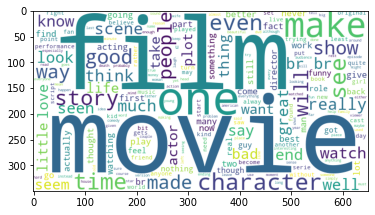

In [70]:
plt.imshow(figures['baseline cloud'])

In [10]:
def text_cleaning_with_numbers_as_text(text):
    lemmatize = WordNetLemmatizer()
    text = text.lower()
    contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would",
                "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
    text = ' '.join([contractions[word] if word in contractions else word for word in text.split()])
    text = re.sub(r'[^0-9a-zA-Z\s]+','',text)
    text = text.translate(str.maketrans('','',string.punctuation))
    text = ' '.join([num2words(word) if word.isdigit() else word for word in text.split()])
    while re.search('-',text):
        text = re.sub('-',' ',text)
    words = nltk.word_tokenize(text)
    stopword = set(stopwords.words('english'))
    new_words = [word for word in words if word not in stopword]
    lem_words = [lemmatize.lemmatize(word) for word in new_words]
    return ' '.join(lem_words)

In [11]:
from collections import Counter

In [14]:
sample = dict()

In [15]:
model_name = 'Sentiment Analysis'

In [186]:
def semantic_drift(production_run, model_name):
    
    baseline = pd.read_csv(f"models/{model_name}/embeds/baseline.csv")
    production = pd.read_csv(f"models/{model_name}/embeds/{production_run}.csv")
    
    if 'Unnamed: 0' in production.columns:
        production.drop('Unnamed: 0', axis=1, inplace=True)
    if 'Unnamed: 0' in baseline.columns:
        baseline.drop('Unnamed: 0', axis=1, inplace=True)
    
    tsne_b = TSNE(n_components = 2, random_state=42)
    tsne_base = tsne_b.fit_transform(baseline[:1000])
    
    tsne_p = TSNE(n_components = 2, random_state=42)
    tsne_pr = tsne_p.fit_transform(production[:1000])
    
    figure = go.Figure()
    figure.add_trace(go.Scatter(x=[i[0] for i in tsne_base], y=[i[1] for i in tsne_base],
                    mode='markers',
                    name='Baseline'))
    figure.add_trace(go.Scatter(x=[i[0] for i in tsne_pr], y=[i[1] for i in tsne_pr],
                    mode='markers',
                    name='Production'))
    figure.update_layout(
                        #xaxis_title=x,
                        #yaxis_title=' ',
                        # title_font={"size": 20},
                        xaxis_title_font={"size":16, "color":"black"},
                        yaxis_title_font={"size":16, "color":"black"},
                        width=1080,
                        height=500)
    
    edges = []
    pr_node_sizes = dict()
    bs_nodes_used = []
    edge_alpha = dict()
    
    random_state = random.randint(1,100)
    
    baseline_sample = baseline.sample(15, random_state=random_state)
    prod_sample = production.sample(15, random_state=random_state)
    
    for i in range(len(prod_sample)):
        sim = cosine_similarity(X=[prod_sample.iloc[i]], Y=baseline_sample)
        indices = np.where(sim>0.45)[1]
        bs_nodes_used.extend(list(baseline_sample.iloc[indices].index))
        pr_node_sizes[prod_sample.index[i]] = len(indices) + 100
        for j in indices:
            edges.append((prod_sample.index[i], baseline_sample.index[j]))
            edge_alpha[(prod_sample.index[i], baseline_sample.index[j])] = sim[0][j]
        
    bs_node_sizes = {i:bs_nodes_used.count(i) + 100 for i in baseline_sample.index}
    
    isolated = set(prod_sample.index) - set([i for (i,j) in edges]) 
    number_isolated = round(len(isolated) / len(prod_sample), 2) * 100
    
    G = nx.Graph()
    for i in list(bs_node_sizes.keys()):
        G.add_node(i, size=(bs_node_sizes[i]+1)*50, label="Baseline", node_type="Baseline", alpha=(bs_node_sizes[i])/max(bs_node_sizes.values()), color="red")

    for i in list(pr_node_sizes.keys()):
        G.add_node(i, size=(pr_node_sizes[i]+1)*50, label="Production", node_type="Production", alpha=(pr_node_sizes[i])/max(pr_node_sizes.values()), color="blue")

    G.add_edges_from(edges)

    node_sizes = [G.nodes[node]['size'] for node in G.nodes]
    node_colors = [G.nodes[node]['color'] for node in G.nodes]
    node_alphas = [G.nodes[node]['alpha'] for node in G.nodes]

    plt.figure(figsize=(15,10))
    nx.draw_networkx_nodes(G, nx.shell_layout(G), node_size=node_sizes, node_color=node_colors, alpha=node_alphas)
    nx.draw_networkx_edges(G, nx.shell_layout(G), edgelist=edges)
    nx.draw_networkx_labels(G, nx.shell_layout(G), labels={n:n for n in G})
    plt.show()
    
    return figure, number_isolated, isolated
    

[6125, 6125, 6125, 6125, 6125, 6125, 6125, 6125, 4195, 4195, 4195, 4195, 3673, 3673, 5643, 5643, 5643, 5643, 5643, 5643, 5643, 5643, 5643, 5643, 8017, 8017, 8017, 8017, 8017, 8017, 8017, 721, 721, 8415, 8415, 8415, 8415, 8415, 8415, 5321, 5321, 5321, 4941, 4941, 4941, 4941, 4781, 4781, 8989, 2032, 2032, 2032, 3950, 3950, 3950, 3950, 3950, 3950, 3950, 3950, 3950, 9699, 9699, 9699, 9699, 9699, 9699] Int64Index([6125, 4195, 3673, 5643, 8017,  721, 8415, 5321, 4941, 4781, 8989,
            2032, 3950,  326, 9699],
           dtype='int64')


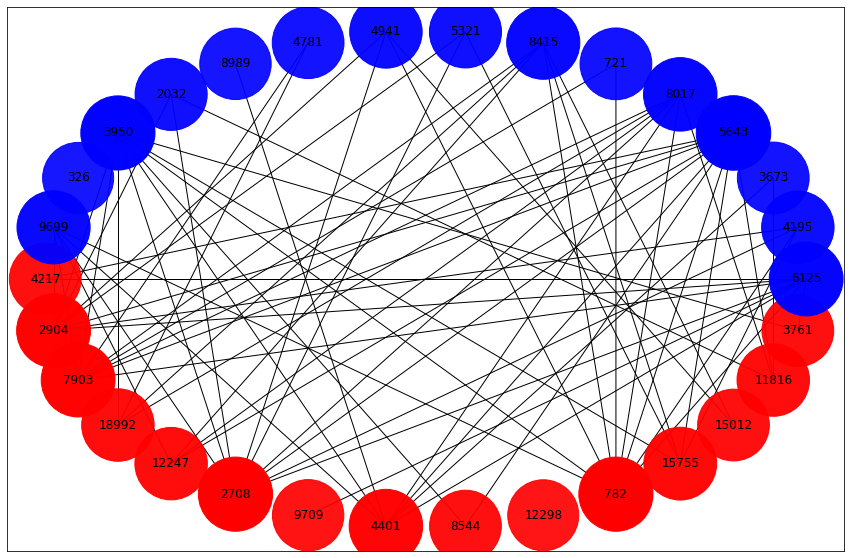

In [184]:
indices, sample = semantic_drift(embeds_b, embeds_p)

In [185]:
indices, sample

(0.06666666666666667, {326})

In [180]:
14/15

0.9333333333333333

In [ ]:
def preprocess_for_embedding(text):
    
    text = text.lower()
    contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would",
                "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
    text = ' '.join([contractions[word] if word in contractions else word for word in text.split()])
    text = re.sub(r'[^0-9a-zA-Z\s]+','',text)
    text = text.translate(str.maketrans('','',string.punctuation))
    text = ' '.join([num2words(word) if word.isdigit() else word for word in text.split()])
    while re.search('-',text):
        text = re.sub('-',' ',text)
    while re.search(',',text):
        text = re.sub(',',' ',text)
    return text

In [76]:
baseline.iloc[[1,2,3]]

,text,target
1,I thought this was a wonderful way to spend ti...,positive
2,Basically there's a family where a little boy ...,negative
3,I saw this movie when I was about 12 when it c...,negative


In [79]:
embeds_b = pd.read_csv("./embeds/baseline.csv")

In [81]:
embeds_p = pd.read_csv("./embeds/01st Dec 2023.csv")

In [88]:
from sklearn.metrics.pairwise import cosine_similarity

In [90]:
embeds_b.drop("Unnamed: 0", axis=1,)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
0,0,0.006050,-0.016593,0.001155,0.018424,0.020092,0.046324,-0.059754,0.030413,-0.024743,...,0.005908,-0.071767,0.054923,-0.024841,0.041014,0.043903,-0.061369,0.027550,0.069503,-0.039726
1,1,0.012237,-0.047005,0.051671,0.030580,-0.004033,0.026914,0.017735,-0.034411,0.073894,...,-0.070404,-0.081765,-0.016241,-0.027485,-0.047891,-0.032621,0.018805,0.008080,0.082190,0.051600
2,2,0.032151,0.023147,0.033169,0.066268,-0.052366,0.067995,-0.010853,0.005723,0.033135,...,0.066430,-0.073865,-0.029605,0.030247,-0.031805,0.033735,0.005420,-0.054476,0.074101,0.001172
3,3,-0.010883,0.016461,-0.008219,0.024268,-0.065021,-0.067760,0.047286,0.036287,-0.017923,...,0.053981,-0.083197,0.063540,0.011628,0.016415,0.054712,-0.005708,0.008809,0.083578,0.045002
4,4,-0.034747,0.020345,0.011387,0.048484,0.064246,0.058414,0.027139,-0.036902,0.021393,...,-0.029080,-0.068651,-0.043614,-0.032114,-0.060470,-0.020057,0.031100,-0.003573,0.068648,-0.057017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,-0.026830,-0.026241,0.072819,0.066375,-0.009852,0.054146,-0.065939,0.067023,0.061609,...,-0.036583,-0.084289,-0.027501,0.023716,0.010617,0.067969,0.032565,-0.010774,0.083379,-0.017284
19996,19996,-0.040771,-0.028751,0.049035,0.016948,0.060770,0.036243,0.045936,0.041519,0.059387,...,0.028593,-0.065478,-0.016884,-0.004891,0.021486,0.021544,0.036606,0.018427,0.065426,-0.023781
19997,19997,-0.055497,-0.028683,0.026071,0.069784,0.057183,0.042732,0.007709,0.003756,0.072385,...,-0.042055,-0.073265,0.052462,0.033908,-0.047739,0.012855,-0.002621,-0.054344,0.073432,0.042603
19998,19998,-0.009747,-0.042329,0.073703,0.008836,0.009208,0.056574,-0.005032,0.007192,0.070992,...,-0.057792,-0.078494,-0.039422,-0.028963,-0.056606,0.024920,0.064502,-0.024780,0.080860,0.028009


In [95]:
pip install networkx --upgrade

  Attempting uninstall: networkx
    Found existing installation: networkx 2.5
    Uninstalling networkx-2.5:
      Successfully uninstalled networkx-2.5
Note: you may need to restart the kernel to use updated packages.


In [96]:
import networkx as nx

In [115]:
set(embeds_b.index)  - set([i for i in range(9000)])

{9000,
 9001,
 9002,
 9003,
 9004,
 9005,
 9006,
 9007,
 9008,
 9009,
 9010,
 9011,
 9012,
 9013,
 9014,
 9015,
 9016,
 9017,
 9018,
 9019,
 9020,
 9021,
 9022,
 9023,
 9024,
 9025,
 9026,
 9027,
 9028,
 9029,
 9030,
 9031,
 9032,
 9033,
 9034,
 9035,
 9036,
 9037,
 9038,
 9039,
 9040,
 9041,
 9042,
 9043,
 9044,
 9045,
 9046,
 9047,
 9048,
 9049,
 9050,
 9051,
 9052,
 9053,
 9054,
 9055,
 9056,
 9057,
 9058,
 9059,
 9060,
 9061,
 9062,
 9063,
 9064,
 9065,
 9066,
 9067,
 9068,
 9069,
 9070,
 9071,
 9072,
 9073,
 9074,
 9075,
 9076,
 9077,
 9078,
 9079,
 9080,
 9081,
 9082,
 9083,
 9084,
 9085,
 9086,
 9087,
 9088,
 9089,
 9090,
 9091,
 9092,
 9093,
 9094,
 9095,
 9096,
 9097,
 9098,
 9099,
 9100,
 9101,
 9102,
 9103,
 9104,
 9105,
 9106,
 9107,
 9108,
 9109,
 9110,
 9111,
 9112,
 9113,
 9114,
 9115,
 9116,
 9117,
 9118,
 9119,
 9120,
 9121,
 9122,
 9123,
 9124,
 9125,
 9126,
 9127,
 9128,
 9129,
 9130,
 9131,
 9132,
 9133,
 9134,
 9135,
 9136,
 9137,
 9138,
 9139,
 9140,
 9141,
 9142,

In [111]:
embeds_b.index

RangeIndex(start=0, stop=20000, step=1)

In [114]:
set(embeds_b.index)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [113]:
set([i for i in range(9000)]) 

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [116]:
import random

In [121]:
random.randint(1,100)

43

In [138]:
bs_node_sizes

NameError: name 'bs_node_sizes' is not defined

In [157]:
edge_alpha

NameError: name 'edge_alpha' is not defined

In [170]:
[i for (i,j) in [(1,2), (3,4)]]

[1, 3]

In [235]:
baseline_helper = pd.read_csv("baseline.csv")

In [236]:
baseline_helper.head()

,Unnamed: 0,text,length,readability
0,0,One of the other reviewers has mentioned that ...,307,8.0
1,1,I thought this was a wonderful way to spend ti...,166,11.7
2,2,Basically there's a family where a little boy ...,138,6.2
3,3,I saw this movie when I was about 12 when it c...,180,7.6
4,4,So im not a big fan of Boll's work but then ag...,398,6.5


In [237]:
helper.to_csv("01st Dec 2023.csv")

In [243]:
import os
import json

In [239]:
os.listdir("C:/Users/Akshat Mittu/Desktop/Model Monitoring Dashboard/pages/models")

['Heart Disease Prediction',
 'Medical Cost Prediction',
 'Music Affect Prediction',
 'Sentiment Analysis']

In [240]:
output_models = {"Heart Disease Prediction": "Classification", "Medical Cost Prediction": "Regression", "Music Affect Prediction": "Classification", "Sentiment Analysis": "Classification"}

In [241]:
output_models

{'Heart Disease Prediction': 'Classification',
 'Medical Cost Prediction': 'Regression',
 'Music Affect Prediction': 'Classification',
 'Sentiment Analysis': 'Classification'}

In [244]:
with open("C:/Users/Akshat Mittu/Desktop/Model Monitoring Dashboard/pages/output.json", "w") as f:
    json.dump(output_models, f)

### NLP Explainer

In [1]:
from lime.lime_text import LimeTextExplainer

In [2]:
import joblib

In [3]:
import pandas as pd

In [4]:
baseline = pd.read_csv("baseline.csv")

In [5]:
vect = joblib.load("TFIDF_Sentiment_Analysis.joblib")

In [6]:
model = joblib.load("Sentiment_Analysis.joblib")

In [10]:
def pipeline_nlp(text):
    
    text = vect.transform(text)
    return model.predict_proba(text)

In [ ]:
def text_cleaning_with_numbers_as_text(text):
    lemmatize = WordNetLemmatizer()
    text = text.lower()
    contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would",
                "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
    text = ' '.join([contractions[word] if word in contractions else word for word in text.split()])
    text = re.sub(r'[^0-9a-zA-Z\s]+','',text)
    text = text.translate(str.maketrans('','',string.punctuation))
    text = ' '.join([num2words(word) if word.isdigit() else word for word in text.split()])
    while re.search('-',text):
        text = re.sub('-',' ',text)
    words = nltk.word_tokenize(text)
    stopword = set(stopwords.words('english'))
    new_words = [word for word in words if word not in stopword]
    lem_words = [lemmatize.lemmatize(word) for word in new_words]
    return ' '.join(lem_words)

In [12]:
pipeline_nlp(baseline['cleaned_text'].sample(20, random_state=42))

array([[0.20303196, 0.79696804],
       [0.36825704, 0.63174296],
       [0.21391695, 0.78608305],
       [0.62410284, 0.37589716],
       [0.85611724, 0.14388276],
       [0.71267991, 0.28732009],
       [0.12585348, 0.87414652],
       [0.36349887, 0.63650113],
       [0.58344153, 0.41655847],
       [0.87382845, 0.12617155],
       [0.75610492, 0.24389508],
       [0.62266054, 0.37733946],
       [0.87111492, 0.12888508],
       [0.16512576, 0.83487424],
       [0.18156565, 0.81843435],
       [0.41615113, 0.58384887],
       [0.92221557, 0.07778443],
       [0.31281323, 0.68718677],
       [0.10038715, 0.89961285],
       [0.65454637, 0.34545363]])

In [13]:
baseline.head()

,Unnamed: 0,text,target,cleaned_text
0,0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching one oz episode...
1,1,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
2,2,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
3,3,I saw this movie when I was about 12 when it c...,negative,saw movie twelve came recall scariest scene bi...
4,4,So im not a big fan of Boll's work but then ag...,negative,im big fan boll work many enjoyed movie postal...


In [35]:
explainer = LimeTextExplainer(class_names=baseline['target'].unique()[::-1])

In [49]:
baseline[baseline['target'] == 'positive']['text'].sample(1).iloc[0]

'Buddy is an entertaining family film set in a time when "humanizing" animals, and making them cute was an accepted way to get people to be interested in them.<br /><br />Based on a true story, Buddy shows the great love that the main characters have for animals and for each other, and that they will do anything for each other.<br /><br />While not a perfect movie, the animated gorilla is quite lifelike most of the time and the mayhem that occurs within the home is usually amusing for children.<br /><br />This film misses an opportunity to address the mistake of bringing wild animals into the home as pets, but does show the difficulties.<br /><br />A recommended film which was the first for Jim Henson Productions.'

In [50]:
for i in baseline['target'].unique()[::-1]:
    print(i)

negative
positive


In [47]:
explain = explainer.explain_instance(baseline[baseline['target'] == 'positive'].sample(1)['text'], pipeline_nlp, num_features=10, top_labels=1)

TypeError: expected string or bytes-like object

In [37]:
explain.show_in_notebook(text=True)